In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

num_topics = 16
df_gamma = pd.read_csv(f"~/Desktop/R_js/data1/gamma/pro{num_topics}_gamma.csv")

root = os.path.expanduser('~')

display(df_gamma.head())
print(df_gamma.shape)

,document,topic,gamma
0,1,1,0.018924
1,2,1,0.034041
2,3,1,0.049521
3,4,1,0.028633
4,5,1,0.028980


(537920, 3)


In [2]:
537920/16


33620.0

In [3]:
df_gamma[df_gamma.topic == 15].gamma

470680    0.011122
470681    0.057243
470682    0.029803
470683    0.020980
470684    0.034071
            ...   
504295    0.042720
504296    0.061635
504297    0.040312
504298    0.033224
504299    0.023733
Name: gamma, Length: 33620, dtype: float64

In [4]:
df_topic = df_gamma[df_gamma.document == 5]
df_topic.head()
df_topic.gamma.sum()

1.0

In [5]:
df_data = pd.read_csv(f"~/Desktop/R_js/data/pro_doc_sampled.csv")
display(df_data.head())
df_data.shape


,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
0,0,2.0,1,2017,"hour lunch, friendly co-workers.",cowork friendli hour lunch friendli_cowork hou...,"['cowork', 'friendli', 'hour', 'lunch', 'frien...",9,3.0,2.0,2.0,1.0,3.0,1,Walmart
1,1,3.0,1,2015,"benefits, Medical, dental, myshare, 401k, stocks",benefit dental medic myshar stock,"['benefit', 'dental', 'medic', 'myshar', 'stock']",5,3.0,4.0,4.0,3.0,3.0,1,Walmart
2,2,2.0,0,2012,discount card . schedule 3 on 3 off,card discount schedul discount_card,"['card', 'discount', 'schedul', 'discount_card']",4,1.0,4.0,3.0,1.0,3.0,1,Walmart
3,3,4.0,0,2017,good break lengths and plenty of hours,break hour length plenti plenti_hour,"['break', 'hour', 'length', 'plenti', 'plenti_...",5,4.0,3.0,3.0,4.0,4.0,1,Walmart
4,4,1.0,1,2016,My pay was good and my schedule allowed me to ...,allow job pay schedul pay_schedul,"['allow', 'job', 'pay', 'schedul', 'pay_schedul']",5,3.0,3.0,1.0,1.0,1.0,1,Walmart


(33624, 15)

In [6]:
# Pros
docs_removed = [1139, 1991, 2100, 20740]
docs_removed = [s-1 for s in docs_removed]
docs_removed

# Cons

[1138, 1990, 2099, 20739]

In [7]:
df_data.iloc[docs_removed]

,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name
1138,1138,4.0,0,2017,Elevado grau de aprendizado,aprendizado de elevado grau,"['aprendizado', 'de', 'elevado', 'grau']",4,1.0,5.0,4.0,4.0,5.0,2,Exxonmobil
1990,1990,3.0,0,2018,Servizio navetta e buoni pasto,buoni navetta pasto servizio,"['buoni', 'navetta', 'pasto', 'servizio']",4,2.0,4.0,4.0,4.0,4.0,3,Apple
2099,2099,4.0,0,2018,"salaire, avantages, opportunités, voyages, dyn...",avantag dynamism jeun opportunité salair voyag,"['avantag', 'dynamism', 'jeun', 'opportunité',...",6,2.0,5.0,4.0,3.0,4.0,3,Apple
20739,20739,4.0,0,2018,Nous apprenons tous les jours,apprenon jour le nou tou,"['apprenon', 'jour', 'le', 'nou', 'tou']",5,3.0,2.0,3.0,3.0,3.0,30,Citigroup


In [8]:
df_data.drop(df_data.index[docs_removed], inplace=True)
df_data.shape

(33620, 15)

In [9]:
df = df_data.copy()

In [10]:
pd.set_option('display.max_columns', 500)
for i in range(1, num_topics+1): 
    df[str(i)] = df_gamma[df_gamma.topic == i].gamma.tolist()

df.head()

,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,2.0,1,2017,"hour lunch, friendly co-workers.",cowork friendli hour lunch friendli_cowork hou...,"['cowork', 'friendli', 'hour', 'lunch', 'frien...",9,3.0,2.0,2.0,1.0,3.0,1,Walmart,0.018924,0.005845,0.015535,0.053376,0.022494,0.716280,0.031638,0.008902,0.007722,0.029891,0.013851,0.006456,0.021041,0.011867,0.011122,0.025057
1,1,3.0,1,2015,"benefits, Medical, dental, myshare, 401k, stocks",benefit dental medic myshar stock,"['benefit', 'dental', 'medic', 'myshar', 'stock']",5,3.0,4.0,4.0,3.0,3.0,1,Walmart,0.034041,0.032739,0.098347,0.027553,0.022152,0.025925,0.119455,0.027463,0.061912,0.041311,0.038552,0.249269,0.059090,0.060137,0.057243,0.044808
2,2,2.0,0,2012,discount card . schedule 3 on 3 off,card discount schedul discount_card,"['card', 'discount', 'schedul', 'discount_card']",4,1.0,4.0,3.0,1.0,3.0,1,Walmart,0.049521,0.023282,0.067247,0.029825,0.041212,0.041913,0.055859,0.023736,0.069498,0.045407,0.314640,0.022431,0.036031,0.079589,0.029803,0.070006
3,3,4.0,0,2017,good break lengths and plenty of hours,break hour length plenti plenti_hour,"['break', 'hour', 'length', 'plenti', 'plenti_...",5,4.0,3.0,3.0,4.0,4.0,1,Walmart,0.028633,0.010440,0.025424,0.027464,0.038695,0.557450,0.034515,0.012540,0.011206,0.116200,0.021833,0.009858,0.033159,0.020678,0.020980,0.030923
4,4,1.0,1,2016,My pay was good and my schedule allowed me to ...,allow job pay schedul pay_schedul,"['allow', 'job', 'pay', 'schedul', 'pay_schedul']",5,3.0,3.0,1.0,1.0,1.0,1,Walmart,0.028980,0.025918,0.108572,0.025876,0.013811,0.039008,0.070747,0.024932,0.085399,0.040880,0.035328,0.104503,0.079414,0.070126,0.034071,0.212434


In [11]:
df["1"].sum()

2192.271044973007

In [12]:
df[df.Company_Name == "Walmart"]["1"].sum()

71.79378208608466

In [13]:
71.79378208608466/2192.271044973007


0.03274858838769576

In [14]:
df.groupby(['Company_Name'])['Company_Name'].count()

Company_Name
AT&T                           1000
Amazon                         1000
AmerisourceBergen               258
Anthem                          718
Apple                           998
Archer-Daniels-Midland          105
Bank-of-America                1000
Berkshire-Hathaway               33
Boeing                         1000
CVS-Health                     1000
Cardinal-Health                 533
Chevron                         519
Citigroup                       999
Comcast                        1000
Costco-Wholesale               1000
Dell-Technologies               933
DuPont-de-Nemours               208
Exxonmobil                      319
Fannie-Mae                      151
FedEx                          1000
Ford-Motor-Company              450
Freddie-Mac                     118
General-Electric                715
General-Motors                  603
Google                          421
Home-Depot                     1000
IBM                            1000
Intel          

In [15]:
f50_list = pd.read_csv(root + \
            '/Desktop/workspace/indeed/Job-Satisfaction/data/Fortune_1000/fortune50_info.csv')


In [16]:
df_prop = pd.DataFrame()
df_prop['Company_Name'] = df.Company_Name.unique()
# display(df_prop.head())

sectors = []
for company_index in range(1, 51):
    sector = f50_list.iloc[company_index - 1]['Sector']
    sectors.append(sector)

df_prop['Sector'] = sectors

for topic in range(1, num_topics+1):
    tot = df[str(topic)].sum() * df[str(topic)].count()
    props = []
    sum = 0 
    for company in df.Company_Name.unique():
        company_sum = df[df.Company_Name == company][str(topic)].sum()
        company_count = df[df.Company_Name == company][str(topic)].count()
        company_prop = company_sum / company_count
        sum += company_prop
        props.append(company_prop)
    props = [x/sum for x in props]
    df_prop[str(topic)] = props

display(df_prop.head())
    

,Company_Name,Sector,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Walmart,Retailing,0.021784,0.009423,0.015080,0.023401,0.017681,0.060756,0.017458,0.015018,0.013115,0.017803,0.022212,0.010249,0.017264,0.014418,0.018106,0.017534
1,Exxonmobil,Energy,0.030030,0.020314,0.016823,0.021593,0.025280,0.021700,0.021757,0.022551,0.019591,0.017273,0.019238,0.016060,0.016100,0.016022,0.017464,0.014282
2,Apple,Technology,0.021914,0.022520,0.022317,0.020948,0.013562,0.016334,0.023431,0.016981,0.021842,0.017619,0.022040,0.021110,0.020826,0.020122,0.020759,0.022262
3,Berkshire-Hathaway,Financials,0.018288,0.013900,0.016703,0.025276,0.019412,0.021789,0.026750,0.014691,0.023651,0.020597,0.019510,0.020726,0.014425,0.023341,0.017116,0.022385
4,Amazon,Retailing,0.018836,0.012662,0.020285,0.019608,0.020825,0.025204,0.017639,0.020896,0.014501,0.030695,0.016998,0.015041,0.023761,0.016667,0.020844,0.019187


In [24]:
df_sector = df_prop.groupby('Sector').sum().reset_index()
# display(df_sector)

sec_acs = ['AD', 'C', 'E', 'F', 'D', 'B', 'HC', 'HHP', 'I', 'MVP', 'R', 'T', 'TC', 'TR']
df_sector.insert (1, "Sector_Acronym", sec_acs)
# df_sector["Sector_Acronym"] = ['AD', 'C', 'E', 'F', 'D', 'B', 'HC', 'HHP', 'I', 'MVP', 'R', 'T', 'TC', 'TR']
df_sector
# df_sector['1'].sum()


,Sector,Sector_Acronym,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Aerospace & Defense,AD,0.035943,0.044909,0.047670,0.038930,0.021071,0.031632,0.039510,0.030673,0.047658,0.044201,0.040638,0.045770,0.047396,0.048053,0.042279,0.043270
1,Chemicals,C,0.021832,0.016387,0.021068,0.022186,0.014825,0.018427,0.021356,0.018238,0.020656,0.021854,0.019185,0.021502,0.023104,0.021152,0.017374,0.022800
2,Energy,E,0.135648,0.094945,0.083842,0.102922,0.141744,0.100974,0.098746,0.120109,0.092712,0.079619,0.093888,0.088865,0.081155,0.087556,0.094609,0.084523
3,Financials,F,0.164266,0.223703,0.180002,0.174107,0.141133,0.160021,0.198673,0.168762,0.200828,0.193214,0.179155,0.200609,0.164055,0.193809,0.176031,0.198439
4,Food & Drug Stores,D,0.041554,0.023456,0.037023,0.051707,0.023364,0.055756,0.043156,0.030744,0.044889,0.041014,0.049276,0.032145,0.037166,0.039052,0.052101,0.039935
5,"Food, Beverages & Tobacco",B,0.038886,0.039815,0.046065,0.038098,0.039350,0.035561,0.036610,0.046616,0.035501,0.043512,0.039619,0.035965,0.050225,0.038894,0.039508,0.032825
6,Health Care,HC,0.130473,0.153153,0.138130,0.138640,0.142166,0.129634,0.142915,0.137630,0.135843,0.152122,0.136357,0.141433,0.135492,0.142282,0.140518,0.146722
7,Household Products,HHP,0.018502,0.018020,0.022502,0.018664,0.014841,0.016990,0.018458,0.018192,0.026049,0.017264,0.022208,0.018958,0.023166,0.024401,0.020850,0.023288
8,Industrials,I,0.020506,0.020629,0.020172,0.019348,0.015820,0.016430,0.019613,0.020909,0.024261,0.019688,0.021955,0.021837,0.019333,0.023505,0.019031,0.020104
9,Motor Vehicles & Parts,MVP,0.039676,0.035654,0.047978,0.040074,0.026974,0.033202,0.037737,0.029862,0.040937,0.044825,0.041849,0.046480,0.054537,0.042058,0.046628,0.032233


In [33]:
import math
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, save
import os

fs = []
for i in range(1, num_topics+1):
    df_ = pd.DataFrame()
#     df_["x"] = df_sector.nlargest(14, str(i))['Sector_Acronym'].tolist()
    df_["x"] = df_sector.nlargest(14, str(i))['Sector'].tolist()
    df_["top"] = [x*100 for x in df_sector.nlargest(14, str(i))[str(i)].tolist()]
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
    p = figure(x_range=df_["x"], plot_height=400, plot_width=800, title=f"Topic: {i} (Desc)",
           toolbar_location=None, tools="hover")
    p.vbar(x='x', top= 'top', width=0.8, source=source)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)
    
    
#     df_ = pd.DataFrame()
#     df_["x"] = df_prop.nsmallest(10, str(i))['Company_Name'].tolist()
#     df_["top"] = df_prop.nsmallest(10, str(i))[str(i)].tolist()
    
#     source = ColumnDataSource(dict(
#         x=df_['x'],
#         top=df_['top']
#     ))
    
#     p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i} (Asc)",
#            toolbar_location=None, tools="hover")
#     p.vbar(x='x', top= 'top', width=0.8, source=source)
#     hover = p.select(dict(type=HoverTool))
#     hover.tooltips = { "Prob": "@top"}
#     p.xaxis.major_label_orientation = math.pi/2
#     p.title.align = "center"
#     fs.append(p)


root = os.path.expanduser("~")
show(gridplot(fs, ncols=1))
# export_png(p, filename= root + "/Desktop/test.png")
# output_file("test.html")



Loading BokehJS ...

KeyboardInterrupt: 

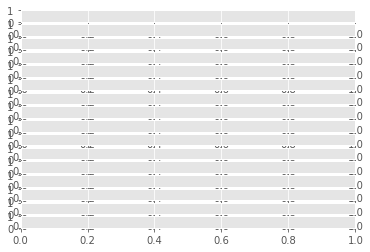

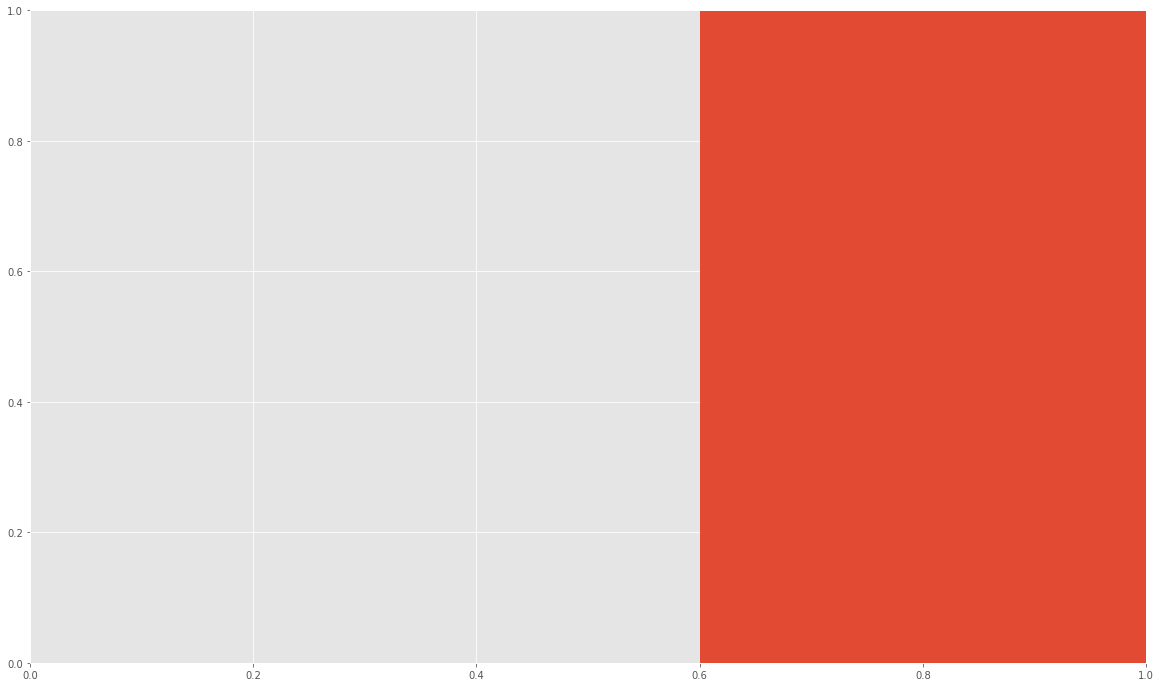

In [42]:
plt.style.use('ggplot')

threshold = .5
fig, ax = plt.subplots(num_topics, 1)

for i in range(2):
    
    ax[i] = df.plot(stacked=True, kind='bar', figsize=(20, 12), rot='horizontal', width=.8)

    # .patches is everything inside of the chart
    i = 0
    j = 0
    for rect in ax[i].patches:
    #     print(rect)
        # Find where everything is located
    #     words = imp_words[i]
    #     i += 1

        height = round(rect.get_height(), 2)
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The width of the bar is the data value and can used as the label
    #     label_text = f'{height}'  # f'{height:.2f}' to format decimal values
        label_text = f'{imp_words[i][j]}'
        i += 1
        if(i == num_topics): 
            i = 0
            j += 1
    #     print(i, j)

        # ax.text(x, y, text)
        label_x = x + width - width/2 # adjust 0.2 to center the label
        label_y = y + height / 2
        ax[i].text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
    ax[i].get_legend().remove()
    ax[i].set_ylabel("Term_Prob", fontsize=18)
    ax[i].set_xlabel("Topic", fontsize=18)
    ax[i].plot([-1, num_topics], [threshold, threshold], "k--")
#     plt.axhline(y=threshold,linewidth=2, color='g', ls="--")


# plt.savefig(root+'/Desktop/paper_fig/stm/con/17/top-ten-words2.png')
plt.show()

In [39]:
import math
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, save
import os

fs = []
for i in range(1, num_topics+1):
    df_ = pd.DataFrame()
#     df_["x"] = df_sector.nlargest(14, str(i))['Sector_Acronym'].tolist()
    df_["x"] = df_sector.nlargest(14, str(i))['Sector'].tolist()
    df_["top"] = [x*100 for x in df_sector.nlargest(14, str(i))[str(i)].tolist()]
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
#     p = figure(x_range=df_["x"], plot_height=400, plot_width=800, title=f"Topic: {i} (Desc)",
#            toolbar_location=None, tools="hover")
    p.vbar_stack(x='x', top= 'top', width=0.8, source=source)
#     p.vbar_stack(df.Company_Name.unique(), x='Sector', width=0.8, source=df_prop)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)
    
    
#     df_ = pd.DataFrame()
#     df_["x"] = df_prop.nsmallest(10, str(i))['Company_Name'].tolist()
#     df_["top"] = df_prop.nsmallest(10, str(i))[str(i)].tolist()
    
#     source = ColumnDataSource(dict(
#         x=df_['x'],
#         top=df_['top']
#     ))
    
#     p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i} (Asc)",
#            toolbar_location=None, tools="hover")
#     p.vbar(x='x', top= 'top', width=0.8, source=source)
#     hover = p.select(dict(type=HoverTool))
#     hover.tooltips = { "Prob": "@top"}
#     p.xaxis.major_label_orientation = math.pi/2
#     p.title.align = "center"
#     fs.append(p)


root = os.path.expanduser("~")
show(gridplot(fs, ncols=1))
# export_png(p, filename= root + "/Desktop/test.png")
# output_file("test.html")



Loading BokehJS ...

TypeError: vbar_stack() missing 1 required positional argument: 'stackers'

In [63]:
df_prop.nlargest(10, '4')['1'].tolist()

[0.022490444164961636,
 0.023139212158238564,
 0.021678459253791707,
 0.018287872126291863,
 0.019063863338625434,
 0.021810107892483332,
 0.021783642098287717,
 0.02183233230332264,
 0.026285527243856403,
 0.019721227663516964]

In [64]:
df_prop['2'].sum()

1.0

In [65]:
import math
from bokeh.plotting import figure, show, output_notebook, save#, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, save
import os

fs = []
for i in range(1, num_topics+1):
    df_ = pd.DataFrame()
    df_["x"] = df_prop.nlargest(10, str(i))['Company_Name'].tolist()
    df_["top"] = [x*100 for x in df_prop.nlargest(10, str(i))[str(i)].tolist()]
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
    p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i} (Desc)",
           toolbar_location=None, tools="hover")
    p.vbar(x='x', top= 'top', width=0.8, source=source)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)
    
    
    df_ = pd.DataFrame()
    df_["x"] = df_prop.nsmallest(10, str(i))['Company_Name'].tolist()
    df_["top"] = df_prop.nsmallest(10, str(i))[str(i)].tolist()
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
    p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i} (Asc)",
           toolbar_location=None, tools="hover")
    p.vbar(x='x', top= 'top', width=0.8, source=source)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)


root = os.path.expanduser("~")
show(gridplot(fs, ncols=2))
# export_png(p, filename= root + "/Desktop/test.png")
# output_file("test.html")



Loading BokehJS ...

In [67]:
# df.head()

,Unnamed: 0,Ratings,Job_Status,Reviewed_Year,Review_Text,Px_Texts,Tknz_Texts,Doc_Length,Work_Life,Benefits,Job_Advancement,Management,Culture,Company_Index,Company_Name,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,2.0,1,2017,"hour lunch, friendly co-workers.",cowork friendli hour lunch friendli_cowork hou...,"['cowork', 'friendli', 'hour', 'lunch', 'frien...",9,3.0,2.0,2.0,1.0,3.0,1,Walmart,0.018924,0.005845,0.015535,0.053376,0.022494,0.716280,0.031638,0.008902,0.007722,0.029891,0.013851,0.006456,0.021041,0.011867,0.011122,0.025057
1,1,3.0,1,2015,"benefits, Medical, dental, myshare, 401k, stocks",benefit dental medic myshar stock,"['benefit', 'dental', 'medic', 'myshar', 'stock']",5,3.0,4.0,4.0,3.0,3.0,1,Walmart,0.034041,0.032739,0.098347,0.027553,0.022152,0.025925,0.119455,0.027463,0.061912,0.041311,0.038552,0.249269,0.059090,0.060137,0.057243,0.044808
2,2,2.0,0,2012,discount card . schedule 3 on 3 off,card discount schedul discount_card,"['card', 'discount', 'schedul', 'discount_card']",4,1.0,4.0,3.0,1.0,3.0,1,Walmart,0.049521,0.023282,0.067247,0.029825,0.041212,0.041913,0.055859,0.023736,0.069498,0.045407,0.314640,0.022431,0.036031,0.079589,0.029803,0.070006
3,3,4.0,0,2017,good break lengths and plenty of hours,break hour length plenti plenti_hour,"['break', 'hour', 'length', 'plenti', 'plenti_...",5,4.0,3.0,3.0,4.0,4.0,1,Walmart,0.028633,0.010440,0.025424,0.027464,0.038695,0.557450,0.034515,0.012540,0.011206,0.116200,0.021833,0.009858,0.033159,0.020678,0.020980,0.030923
4,4,1.0,1,2016,My pay was good and my schedule allowed me to ...,allow job pay schedul pay_schedul,"['allow', 'job', 'pay', 'schedul', 'pay_schedul']",5,3.0,3.0,1.0,1.0,1.0,1,Walmart,0.028980,0.025918,0.108572,0.025876,0.013811,0.039008,0.070747,0.024932,0.085399,0.040880,0.035328,0.104503,0.079414,0.070126,0.034071,0.212434


In [68]:
# df_prop = pd.DataFrame()
# df_prop['Job_Status'] = df.Job_Status.unique()
# # display(df_prop.head())

# for topic in range(1, num_topics+1):
# #     tot = df[str(topic)].sum() * df[str(topic)].count()
#     props = []
#     sum = 0 
#     for stat in df.Job_Status.unique():
#         company_sum = df[df.Job_Status == stat][str(topic)].sum()
#         company_count = df[df.Job_Status == stat][str(topic)].count()
#         company_prop = company_sum / company_count
#         sum += company_prop
#         props.append(company_prop)
#     props = [x/sum for x in props]
#     df_prop[str(topic)] = props

# display(df_prop.head())
    

,Job_Status,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.425352,0.517497,0.535727,0.470338,0.458397,0.490043,0.48528,0.525292,0.487067,0.549279,0.487738,0.517708,0.486742,0.514041,0.505357,0.574442
1,0,0.574648,0.482503,0.464273,0.529662,0.541603,0.509957,0.51472,0.474708,0.512933,0.450721,0.512262,0.482292,0.513258,0.485959,0.494643,0.425558


In [72]:
# import math
# from bokeh.plotting import figure, show, output_notebook, save#, output_file
# from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
# from bokeh.io import export_png
# output_notebook()

# from bokeh.layouts import gridplot
# from bokeh.plotting import figure, output_file, save
# import os

# fs = []
# for i in range(1, num_topics+1):
#     df_ = pd.DataFrame()
# #     df_["x"] = df_prop.nlargest(10, str(i))['Job_Status'].tolist()
#     df_["x"] = df_prop['Job_Status'].tolist()
    
# #     df_["top"] = [x*100 for x in df_prop.nlargest(10, str(i))[str(i)].tolist()]
#     df_["top"] = [x*100 for x in df_prop[str(i)].tolist()]
    
#     source = ColumnDataSource(dict(
#         x=df_['x'],
#         top=df_['top']
#     ))
    
#     p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i} (Desc)",
#            toolbar_location=None, tools="hover")
#     p.vbar(x='x', top= 'top', width=0.8, source=source)
#     hover = p.select(dict(type=HoverTool))
#     hover.tooltips = { "Prob": "@top"}
#     p.xaxis.major_label_orientation = math.pi/2
#     p.title.align = "center"
#     fs.append(p)
    
    
# #     df_ = pd.DataFrame()
# #     df_["x"] = df_prop.nsmallest(10, str(i))['Job_Status'].tolist()
# #     df_["top"] = df_prop.nsmallest(10, str(i))[str(i)].tolist()
    
# #     source = ColumnDataSource(dict(
# #         x=df_['x'],
# #         top=df_['top']
# #     ))
    
# #     p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i} (Asc)",
# #            toolbar_location=None, tools="hover")
# #     p.vbar(x='x', top= 'top', width=0.8, source=source)
# #     hover = p.select(dict(type=HoverTool))
# #     hover.tooltips = { "Prob": "@top"}
# #     p.xaxis.major_label_orientation = math.pi/2
# #     p.title.align = "center"
# #     fs.append(p)


# root = os.path.expanduser("~")
# show(gridplot(fs, ncols=2))
# # export_png(p, filename= root + "/Desktop/test.png")
# # output_file("test.html")



Loading BokehJS ...